# Define The Process of FCM

1. Assume a fixed number of clusters k.
2. Initialization: Randomly initialize the k-means μk associated with the clusters and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).
3. Iteration: Recalculate the centroid of the cluster as the weighted centroid given the probabilities of membership of all data points xi:
u<sub>k </sub>(n+1) = sigma<sub>x<sub>i</sub>=k</sub> x<sub>i</sub> * P(u<sub>k</sub>|x<sub>i</sub>)<sup>b</sup> / sigma<sub>x<sub>i</sub>=k</sub> P(u<sub>k</sub>|x<sub>i</sub>)<sup>b</sup>
4. Iterate until convergence or until a user-specified number of iterations has been reached (the iteration may be trapped at some local maxima or minima).

# FCM Vs K-means
1. Attribution to a cluster: In fuzzy clustering, each point has a probability of belonging to each cluster, rather than completely belonging to just one cluster as it is the case in the traditional k-means. In Fuzzy-C Means clustering, each point has a weighting associated with a particular cluster, so a point doesn’t sit “in a cluster” as much as has a weak or strong association to the cluster, which is determined by the inverse distance to the center of the cluster.
2. Speed: Fuzzy-C means will tend to run slower than K means, since it’s actually doing more work. Each point is evaluated with each cluster, and more operations are involved in each evaluation. K-Means just needs to do a distance calculation, whereas fuzzy c means needs to do a full inverse-distance weighting.
3. Gives best result for overlapped data set and comparatively better then k-means algorithm.

In [7]:
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset 2

In [6]:
data1 = pd.read_csv('data1.csv')
class1 = data1['Class']
data1 = data1[['X' ,'Y']]

Normalizing

In [8]:
data1scale = StandardScaler().fit_transform(data1)

Clustering

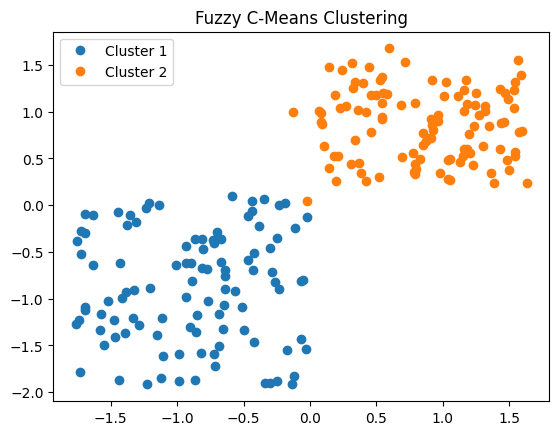

FPC for 2 clusters = 0.8687988381990296


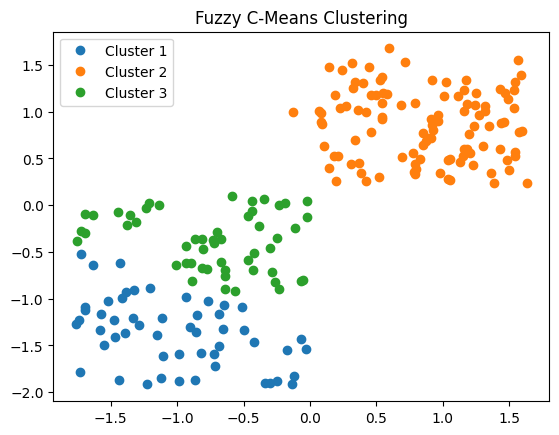

FPC for 3 clusters = 0.7328237247296261


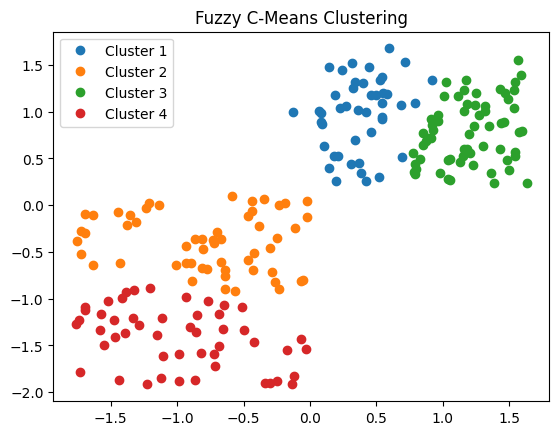

FPC for 4 clusters = 0.6474768477017858


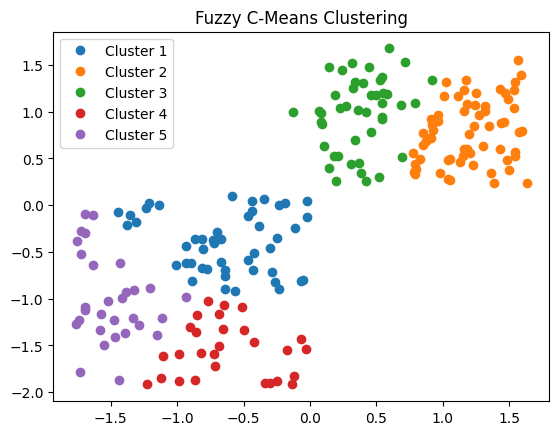

FPC for 5 clusters = 0.6173451305327514


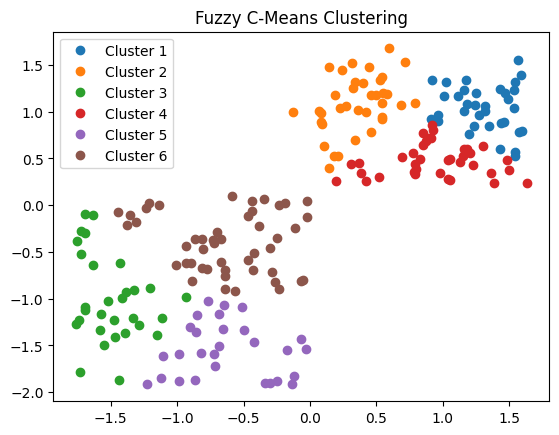

FPC for 6 clusters = 0.5868077058408404


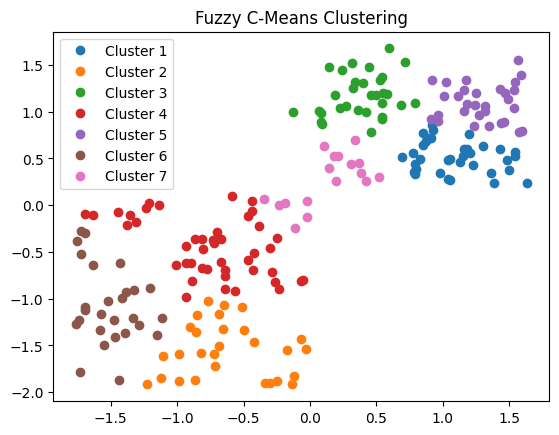

FPC for 7 clusters = 0.5668172899033738


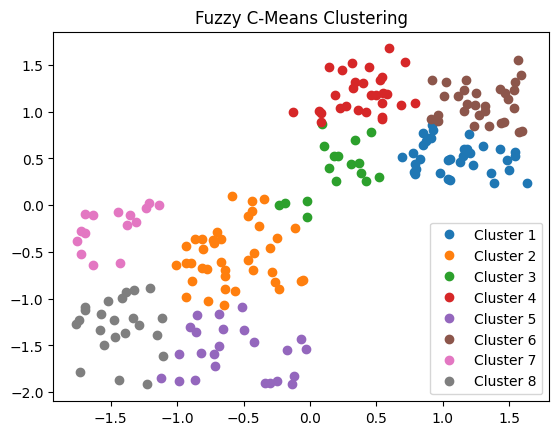

FPC for 8 clusters = 0.5643516373453199


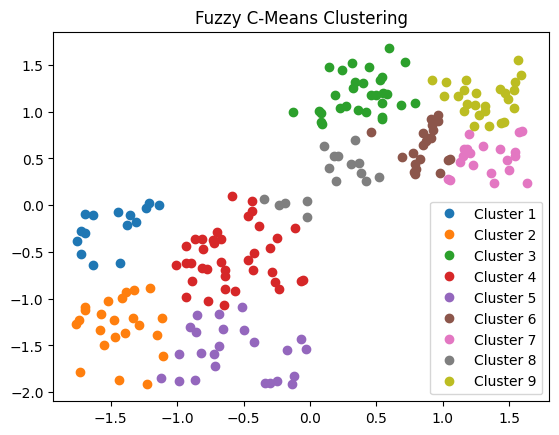

FPC for 9 clusters = 0.5396676385320988


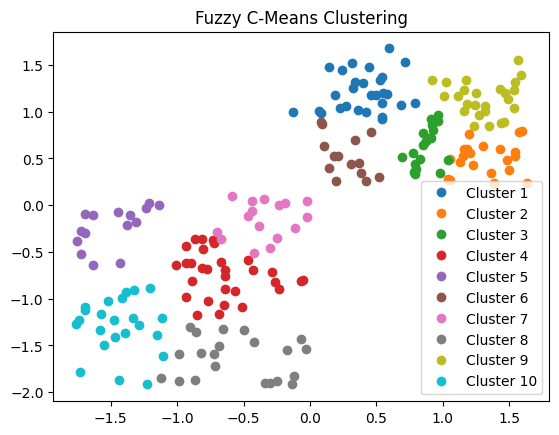

FPC for 10 clusters = 0.5278960807690115


In [12]:
FPCs = []
for num_clusters in range(2 , 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(data1scale.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)


    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(data1scale[cluster_membership == i, 0], data1scale[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')


    ax.set_title('Fuzzy C-Means Clustering')
    ax.legend()
    plt.show()
    FPCs.append(fpc)
    print(f'FPC for {num_clusters} clusters = {fpc}')

# Define FPC
The final fuzzy partition coefficient (FPC) is a measure of how well a fuzzy clustering algorithm partitions a data set into clusters. It is defined as the sum of the squares of the membership degrees of each data point to its assigned cluster, divided by the number of data points. The FPC ranges from 0 to 1, with 1 being the best. A high FPC indicates that the data points are assigned to clusters with high certainty, while a low FPC indicates that the data points are assigned to clusters with low certainty or overlap with other clusters.

The FPC can be calculated as follows:

$$
FPC = \frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{c} u_{ij}^2
$$

where $n$ is the number of data points, $c$ is the number of clusters, and $u_{ij}$ is the membership degree of the $i$-th data point to the $j$-th cluster.

The FPC can be used to evaluate the performance of fuzzy clustering algorithms, such as fuzzy c-means (FCM), and to determine the optimal number of clusters for a given data set. Generally, the FPC increases as the number of clusters increases, but it may reach a peak value at some point and then decrease. The optimal number of clusters can be chosen as the one that maximizes the FPC. However, the FPC is not the only criterion for choosing the number of clusters, and other factors, such as the structure and distribution of the data, should also be considered.

The FPC is one of the commonly used fuzzy clustering validity indices, along with others such as the partition entropy (PE), the Xie–Beni index (XB), the Fukuyama–Sugeno index (FS), and the weighted global-local index (WGLI). Each of these indices has its own advantages and disadvantages, and they may not agree on the optimal number of clusters for a given data set. Therefore, it is advisable to use multiple indices and compare their results to obtain a more reliable and robust clustering solution.

and with regards to this measure the best number of clusters for this dataset is what the below code will show :


In [16]:
print(f'best number of clusters for this dataset is : {max(enumerate(FPCs),key=lambda x: x[1])[0] + 2}')

best number of clusters for this dataset is : 2


# Dataset 2

In [19]:
data2 = pd.read_csv('data2.csv')
class2 = data2['Class']
data2 = data2[['X' ,'Y']]

Normalizing

In [20]:
data2scale = StandardScaler().fit_transform(data2)

Clustering

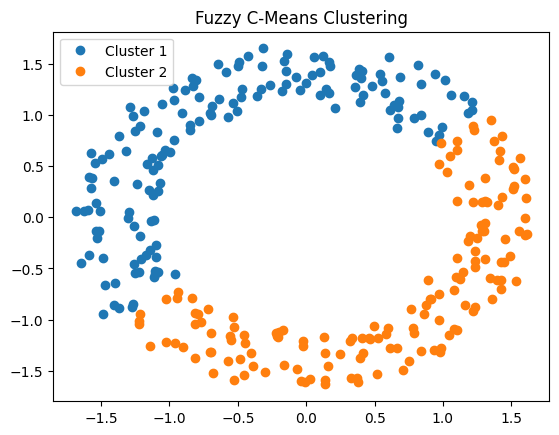

FPC for 2 clusters = 0.7064056919892512


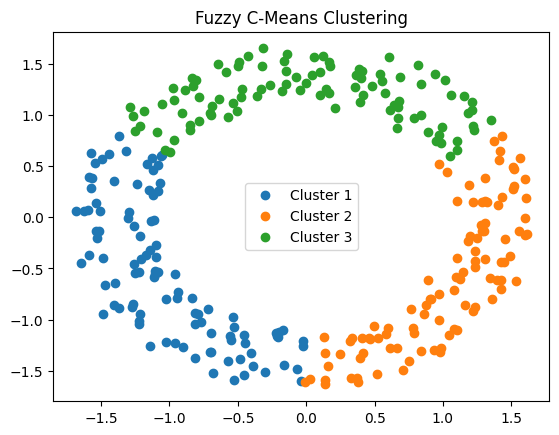

FPC for 3 clusters = 0.6774045523191929


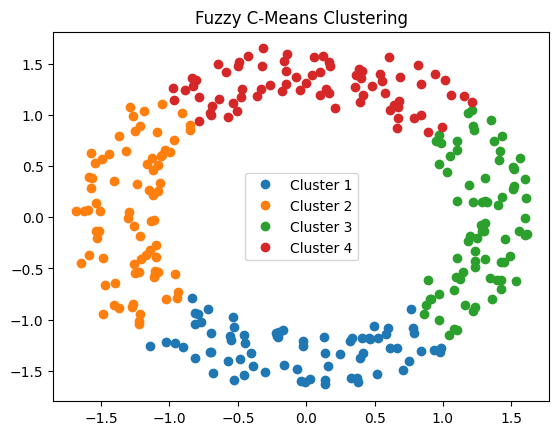

FPC for 4 clusters = 0.6602048079574604


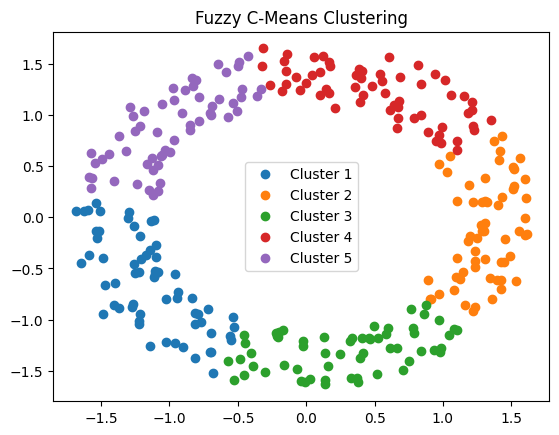

FPC for 5 clusters = 0.6500658760218148


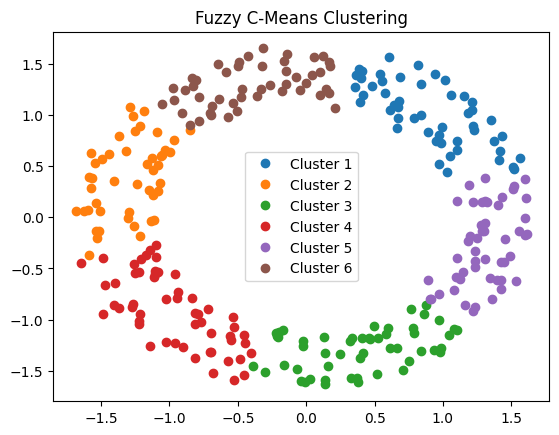

FPC for 6 clusters = 0.632249967824723


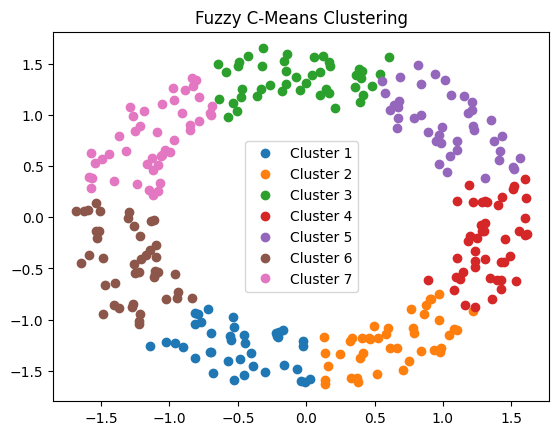

FPC for 7 clusters = 0.6230343732441684


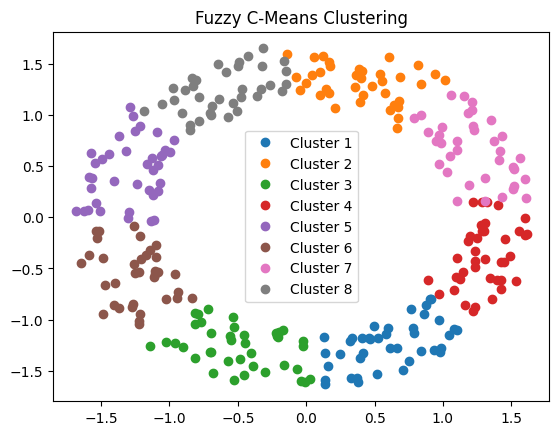

FPC for 8 clusters = 0.611804946222364


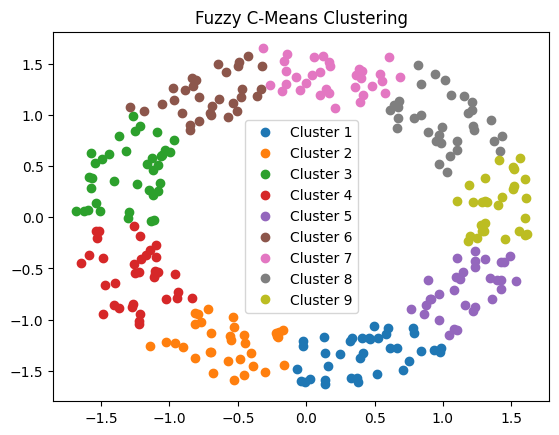

FPC for 9 clusters = 0.5955169109859993


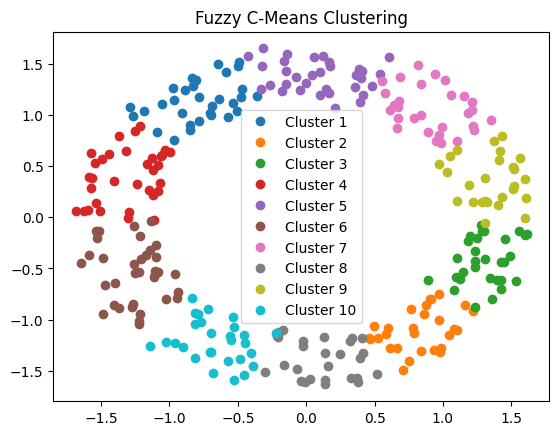

FPC for 10 clusters = 0.5747812033657189


In [22]:
FPCs2 = []
for num_clusters in range(2 , 11):
    cntr, u, u0, d, jm, p, fpc = skfuzzy.cluster.cmeans(data2scale.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

    cluster_membership = np.argmax(u, axis=0)


    fig, ax = plt.subplots()

    for i in range(num_clusters):
        ax.plot(data2scale[cluster_membership == i, 0], data2scale[cluster_membership == i, 1], 'o', label=f'Cluster {i + 1}')


    ax.set_title('Fuzzy C-Means Clustering')
    ax.legend()
    plt.show()
    FPCs2.append(fpc)
    print(f'FPC for {num_clusters} clusters = {fpc}')

In [23]:
print(f'best number of clusters for this dataset is : {max(enumerate(FPCs2),key=lambda x: x[1])[0] + 2}')

best number of clusters for this dataset is : 2
